In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("c:/PruebasAnalisis/framingham.csv")

In [4]:
train.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<Axes: xlabel='glucose', ylabel='diabetes'>

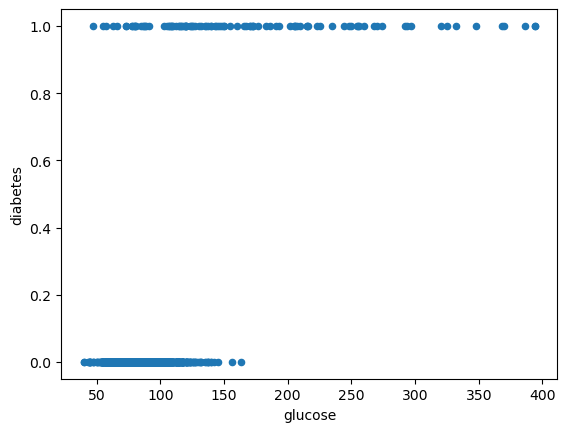

In [16]:
train[["glucose", "diabetes"]].plot.scatter(x="glucose", y="diabetes")

In [33]:
w = 0.02
b = -4.6

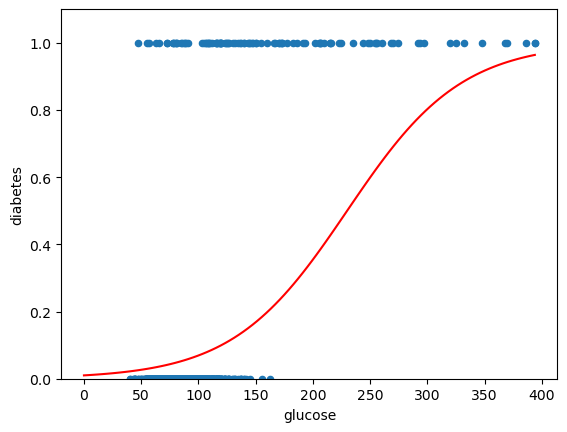

In [34]:
x = np.linspace(0,train["glucose"].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

train.plot.scatter(x="glucose", y="diabetes")
plt.plot(x, y, "r")
plt.ylim(0,train["diabetes"].max()*1.1)

plt.show()

In [35]:
train["sigmoid"] = 1/(1+np.exp(-(train["glucose"]*w+b)))

train["loss_xi"] = -train["diabetes"]*np.log(train["sigmoid"])-(1-train["diabetes"])*np.log(1-train["sigmoid"])
cost_j = train["loss_xi"].mean()
cost_j

0.0951897992361402

In [48]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df =pd.DataFrame(data = array,
                 columns = ["w", "b"])

df["w"] = np.round(df["w"], 6)
df["b"] = np.round(df["b"], 6)

In [49]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [50]:
def sum_error_df(df):
    train["sigmoid"] = 1/(1+np.exp(-(train["glucose"]*df["w"]+df["b"])))
    train["loss_xi"] = -train["diabetes"]*np.log(train["sigmoid"])-(1-train["diabetes"])*np.log(1-train["sigmoid"])
    cost_j = train["loss_xi"].mean()
    return(cost_j)

In [51]:
df["error"] = df.apply(sum_error_df, axis=1)

C:\Users\esmon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
df.sort_values(by=["error"]).head()

,w,b,error
0,0.05,-4.00,0.714814
1,0.05,-3.99,0.719559
2,0.05,-3.98,0.724327
3,0.05,-3.97,0.729117
4,0.05,-3.96,0.733929


In [53]:
df_3d = df.pivot(index="w", columns="b", values="error")

In [54]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,0.714814,0.719559,0.724327,0.729117,0.733929,0.738764,0.743622,0.748502,0.753405,0.758330,...,1.230456,1.237147,1.243857,1.250587,1.257336,1.264105,1.270893,1.277701,1.284527,1.291373
0.06,1.177428,1.183853,1.190298,1.196762,1.203246,1.209750,1.216274,1.222817,1.229380,1.235962,...,1.827897,1.835849,1.843814,1.851793,1.859785,1.867791,1.875810,1.883842,1.891887,1.899945
0.07,1.758032,1.765763,1.773509,1.781269,1.789043,1.796832,1.804635,1.812452,1.820283,1.828129,...,2.503457,2.512209,2.520968,2.529736,2.538512,2.547296,2.556089,2.564889,2.573697,2.582513
0.08,2.420891,2.429489,2.438095,2.446710,2.455335,2.463969,2.472611,2.481263,2.489923,2.498593,...,3.224964,3.234173,3.243388,3.252606,3.261830,3.271058,3.280290,3.289527,3.298769,3.308015
0.09,3.134096,3.143208,3.152326,3.161449,3.170578,3.179711,3.188850,3.197994,3.207144,3.216298,...,3.971485,3.980942,3.990402,3.999864,4.009328,4.018796,4.028265,4.037737,4.047211,4.056688


In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

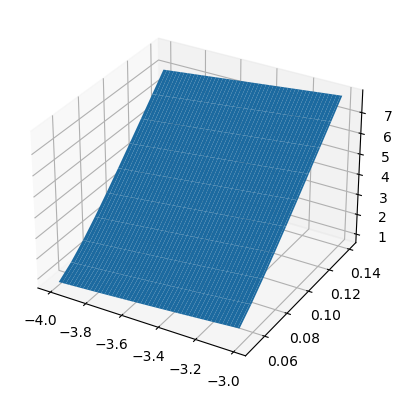

In [57]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection ="3d")
ax.plot_surface(X, Y, Z)

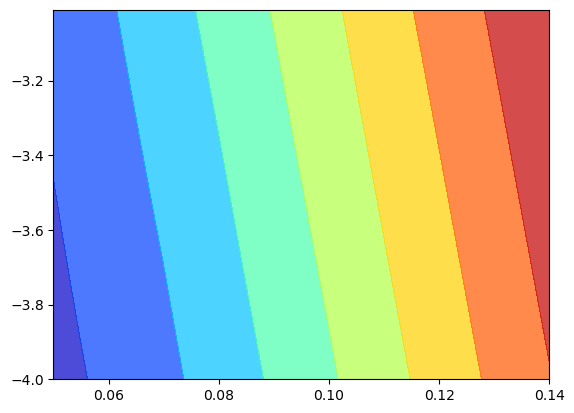

In [58]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)